# Random number & Random variat generation

In [1]:
import math
import random
import matplotlib.pyplot as plt
from enum import Enum
import numpy as np


SEED = 1234
NUMBER_OF_SAMPLES = 1000

print(f"{SEED}, {NUMBER_OF_SAMPLES}")

In [2]:
# generate a list of random numbers from 0 to 1
def generate_array_of_random_numbers(seed, number_of_samples):
    random.seed(seed)
    return [random.random() for _ in range(number_of_samples)]
    
random_numbers = generate_array_of_random_numbers(SEED, NUMBER_OF_SAMPLES)
print("##################")
print(random_numbers)
print("##################")

## Frequency test

In [3]:
D_alpha = 0.410 # from appendix table

def frequency_test(numbers):
    # step 1
    numbers.sort()
    # step 2
    N = len(numbers)
    D_plus_arr = []
    D_minus_arr = []
    D = 0
    for i in range(len(numbers)):
        j = i + 1
        R_i = numbers[i]
        D_plus_i = j/N - R_i
        D_minus_i = R_i - (j-1)/N
        D_plus_arr.append(D_plus_i)
        D_minus_arr.append(D_minus_i)
    D_plus = max(D_plus_arr)
    D_minus = max(D_minus_arr)
    # step 3
    D = max(D_plus, D_minus)
    print(f"D: {D} D_alpha: {D_alpha}")
    # step 4

    # step 5
    if D <= D_alpha:
        print("The numbers are uniformly distributed")
    else:
        print("The numbers are not uniformly distributed")

print(frequency_test(random_numbers))

## Autocorrelation test

The tests for autocorrelation are concerned with the dependence between numbers in a sequence

Z_table:

<table>
    <tr>
        <td><img src="./imgs/A3_1.png" alt="A3_1"></td>
        <td><img src="./imgs/A3_2.png" alt="A3_2"></td>
    </tr>
</table>

In [4]:
lag = l = 5 # Lag is the number of elements to shift the array by
i = 3 # Starting with first element
alpha = 0.05 # Significance level

def get_M(N, l, i):
    M_math = 1 # just to start the loop correctly
    M = 0
    while (i + (M_math + 1) * l) <= N:
        M_math += 1
        M += 1
    return M

def autocorrelation_test(numbers, l = 5, i = 1):
    N = len(numbers)
    M = get_M(N, l, i)
    print(f"M: {M}| N: {N} | l: {l} | i: {i}")
    total_sum = 0
    for m in range(M):
        # just BS formula to code transformation
        k = m + 1
        k_1 = k + 1
        idx_1 = i + k * l
        idx_2 = i + k_1 * l
        R_i_kl = numbers[idx_1]
        R_i_kl_1 = numbers[idx_2]
        iteration_factor = R_i_kl * R_i_kl_1
        total_sum += iteration_factor
    p_il = distribution_of_the_estimator = ((1 / (M + 1)) * total_sum) - 0.25
    rho = standard_deviation_of_the_estimator = math.sqrt(13 * M + 7) / (12 * (M + 1))

    Z_0 = p_il / rho
    
    print(f"p_il: {distribution_of_the_estimator} | rho: {standard_deviation_of_the_estimator}")
    print(f"Z_0: {Z_0}")
    Z_alpha_idx = 0.05 / 2 # 0.025 -> find in table
    value_to_get_from_table = 1 - Z_alpha_idx
    print(f"Value to get from table: {value_to_get_from_table}")
    print(f"{value_to_get_from_table} found on 0.06 & 1.9 in table")
    Z_0975 = 1.96
    Z_0025 = -1.96
    print(f"Z_0975: {Z_0975} | Z_0025: {Z_0025}")
    if Z_0025 < Z_0 < Z_0975:
        print("The numbers are independent")
    else:
        print("The numbers are not independent")
    

print(autocorrelation_test(random_numbers, lag, i))

## Generator for exponential distributions

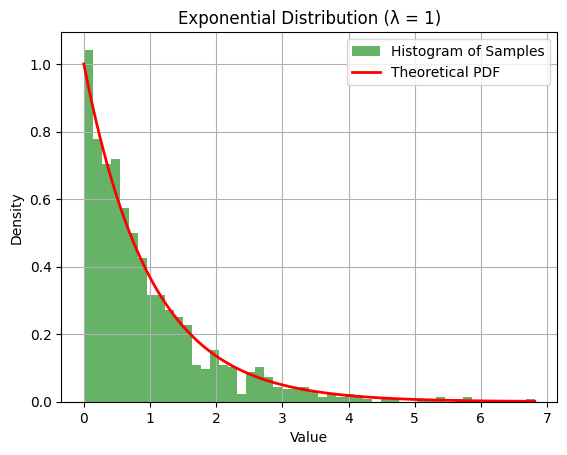

In [9]:
# Parameters for the exponential distribution
lambda_param = 1  # Rate parameter

# Generate random samples from an exponential distribution
data = np.random.exponential(1/lambda_param, NUMBER_OF_SAMPLES)

# Plot the histogram of the data
plt.hist(data, bins=50, density=True, alpha=0.6, color='g', label='Histogram of Samples')

# Prepare to plot the theoretical PDF
x = np.linspace(0, max(data), 1000)  # X values from 0 to max of the sample
y = lambda_param * np.exp(-lambda_param * x)  # Theoretical PDF values

# Overlay the theoretical PDF line
plt.plot(x, y, 'r-', lw=2, label='Theoretical PDF')

# Plot settings
plt.title(f'Exponential Distribution (λ = {lambda_param})')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

## Triangular Distribution

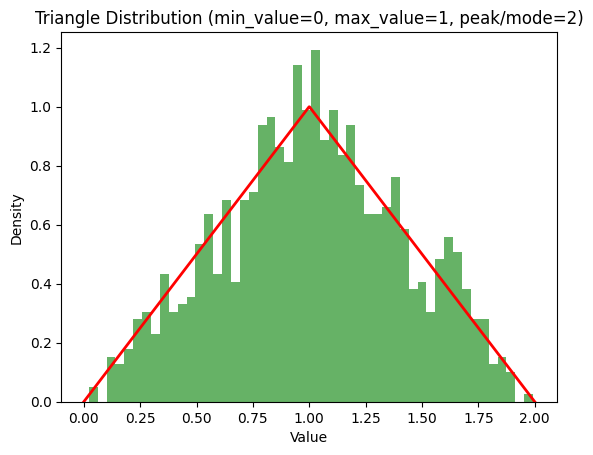

In [5]:
# Parameters for triangle distribution # min_v, mode, max_v
a, b, c = 0, 1, 2

# Triangle distribution function
def triangle_distribution(a, b, c, random_sequence):
    results = []
    for U in random_sequence:
        F_b = (b - a) / (c - a)
        if U < F_b:
            x = a + math.sqrt(U * (b - a) * (c - a))
        else:
            x = c - math.sqrt((1 - U) * (c - b) * (c - a))
        results.append(x)
    return results

# Generate triangle-distributed values
triangle_values = triangle_distribution(a, b, c, random_numbers)

# Plot the histogram of the generated values
plt.hist(triangle_values, bins=50, density=True, alpha=0.6, color='g')

# Plot a line showing the theoretical PDF for reference
x = np.linspace(a, c, 1000)
y = np.piecewise(x, [x < b, x >= b], 
                 [lambda x: 2 * (x - a) / ((b - a) * (c - a)), 
                  lambda x: 2 * (c - x) / ((c - b) * (c - a))])
plt.plot(x, y, 'r-', lw=2)

plt.title(f"Triangle Distribution (min_value={a}, max_value={b}, peak/mode={c})")
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()
